In [1]:
import numpy as np
import os
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adagrad
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import random
import matplotlib.image as mpimg
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
from keras.preprocessing import image

Cat Images

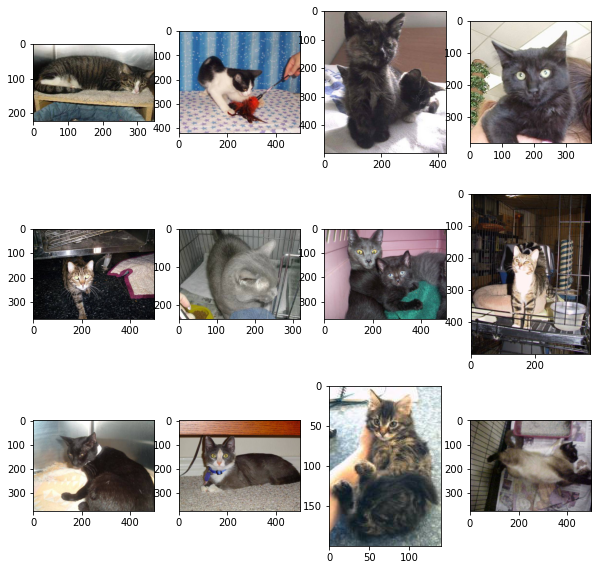

In [2]:
plt.figure(figsize=(10,10))
cat_images="../input/cat-and-dog/training_set/training_set/cats/"
for i in range(12):
    file=random.choice(os.listdir(cat_images))
    cat_image_path=os.path.join(cat_images,file)
    img=mpimg.imread(cat_image_path)
    ax=plt.subplot(3,4,i+1)
    plt.imshow(img)
    
    
   



Dog  Images

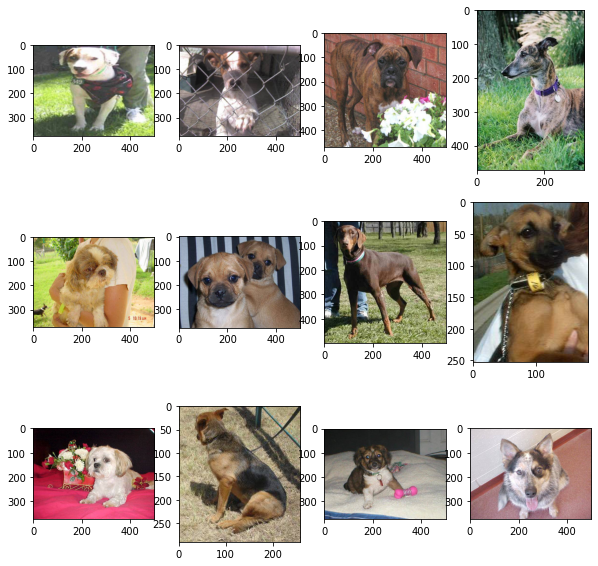

In [3]:
plt.figure(figsize=(10,10))
cat_images="../input/cat-and-dog/training_set/training_set/dogs/"
for i in range(12):
    file=random.choice(os.listdir(cat_images))
    cat_image_path=os.path.join(cat_images,file)
    img=mpimg.imread(cat_image_path)
    ax=plt.subplot(3,4,i+1)
    plt.imshow(img)
    

In [4]:
train_image_path=Path(r"../input/cat-and-dog/training_set/training_set/")
image_path=list(train_image_path.glob(r"**/*.jpg"))
image_label=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],image_path))
final_data = pd.DataFrame({'data':image_path, 'label':image_label}).astype('str')

In [5]:
final_data

,data,label
0,../input/cat-and-dog/training_set/training_set...,dogs
1,../input/cat-and-dog/training_set/training_set...,dogs
2,../input/cat-and-dog/training_set/training_set...,dogs
3,../input/cat-and-dog/training_set/training_set...,dogs
4,../input/cat-and-dog/training_set/training_set...,dogs
...,...,...
8000,../input/cat-and-dog/training_set/training_set...,cats
8001,../input/cat-and-dog/training_set/training_set...,cats
8002,../input/cat-and-dog/training_set/training_set...,cats
8003,../input/cat-and-dog/training_set/training_set...,cats


In [6]:
final_data =final_data.sample(frac=1).reset_index(drop=True)

images From training data

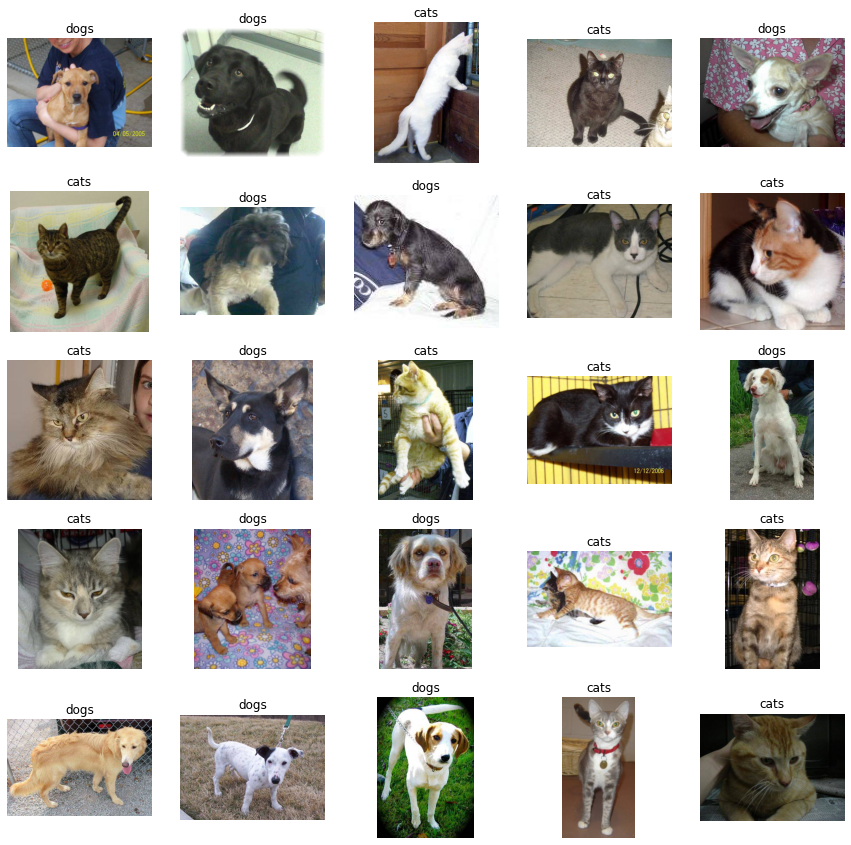

In [7]:
plt.figure(figsize=(15,15))
num_img=(5,5)
for i in range(1,(num_img[0]*num_img[1])+1):
    plt.subplot(num_img[0],num_img[1],i)
    plt.axis("off")
    plt.title(final_data["label"][i])
    plt.imshow(plt.imread(final_data["data"][i]))
    
  

In [8]:
final_data.sample(5)

,data,label
4583,../input/cat-and-dog/training_set/training_set...,cats
4865,../input/cat-and-dog/training_set/training_set...,cats
2810,../input/cat-and-dog/training_set/training_set...,cats
6894,../input/cat-and-dog/training_set/training_set...,cats
5324,../input/cat-and-dog/training_set/training_set...,cats


In [9]:
X_train,X_test=train_test_split(final_data,train_size=0.3,random_state=42)

train_data,valid_data and test_data Generator

In [10]:

traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2, horizontal_flip=True,validation_split=0.2)

testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    

In [11]:
train_data_generator=traindata_generator.flow_from_dataframe(dataframe=X_train,x_col="data",y_col="label",
                                                            target_size=(224,224),
                                                            batch_size=20,
                                                            shuffle=True,
                                                            class_mode="binary")

Found 2401 validated image filenames belonging to 2 classes.


In [12]:
valid_data_generator= traindata_generator.flow_from_dataframe(dataframe=X_test,x_col="data",y_col="label",
                                                            target_size=(224,224),
                                                            batch_size=20,
                                                            shuffle=True,
                                                            class_mode="binary")

Found 5604 validated image filenames belonging to 2 classes.


In [13]:
test_data_generator=testdata_generator.flow_from_dataframe(dataframe=X_train,x_col="data",y_col="label",
                                                            target_size=(224,224),
                                                            batch_size=20,
                                                            shuffle=True,
                                                            class_mode="binary")

Found 2401 validated image filenames belonging to 2 classes.


In [14]:
model=Sequential()

#1st layer

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#2nd layer

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#3rd layer

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#4th layer

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#5th layer

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name="VGG16"))


model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))





2022-10-17 19:31:06.016836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 19:31:06.024784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 19:31:06.025471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 19:31:06.026736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [16]:
vgg_model=Model(inputs=model.input,outputs=model.get_layer("VGG16").output)

In [17]:
vgg_model.load_weights("../input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop-2.h5")

In [18]:
for modellayers in vgg_model.layers:
    modellayers.trainable=False

In [19]:
for model_layer in model.layers:
    print("Layer:",model_layer,"\nTrainable Layer:",model_layer.trainable,"\n")

Layer: <keras.layers.convolutional.Conv2D object at 0x7f285c03dbd0> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f2857fe3e10> 
Trainable Layer: False 

Layer: <keras.layers.pooling.MaxPooling2D object at 0x7f2857fe3710> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f2854176ed0> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f28541c2ed0> 
Trainable Layer: False 

Layer: <keras.layers.pooling.MaxPooling2D object at 0x7f285419de10> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f28541a7150> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f285c341790> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f285419fe10> 
Trainable Layer: False 

Layer: <keras.layers.pooling.MaxPooling2D object at 0x7f2854134610> 
Trainable Layer: False 

Layer: <keras.layers.convolutional.Conv2D object at 0x7f2854

In [20]:
optimizer=SGD(learning_rate=1e-4,momentum=0.9)

In [21]:
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [22]:
early_stoping=EarlyStopping(monitor="val_accuracy",
                           mode="max",verbose=1,patience=20)

In [23]:
history=model.fit(train_data_generator,validation_data=valid_data_generator,epochs=30,verbose=1,callbacks=early_stoping)

2022-10-17 19:31:09.687057: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-10-17 19:31:11.019395: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


121/121 [==============================] - 119s 956ms/step - loss: 0.6459 - accuracy: 0.6352 - val_loss: 0.5847 - val_accuracy: 0.7202
Epoch 2/30
121/121 [==============================] - 110s 917ms/step - loss: 0.5430 - accuracy: 0.7514 - val_loss: 0.5395 - val_accuracy: 0.7074
Epoch 3/30
121/121 [==============================] - 112s 927ms/step - loss: 0.4820 - accuracy: 0.7859 - val_loss: 0.4677 - val_accuracy: 0.7894
Epoch 4/30
121/121 [==============================] - 111s 922ms/step - loss: 0.4530 - accuracy: 0.8017 - val_loss: 0.4188 - val_accuracy: 0.8308
Epoch 5/30
121/121 [==============================] - 110s 918ms/step - loss: 0.4150 - accuracy: 0.8205 - val_loss: 0.3887 - val_accuracy: 0.8469
Epoch 6/30
121/121 [==============================] - 111s 921ms/step - loss: 0.3801 - accuracy: 0.8397 - val_loss: 0.3731 - val_accuracy: 0.8473
Epoch 7/30
121/121 [==============================] - 110s 915ms/step - loss: 0.3625 - accuracy: 0.8451 - val_loss: 0.3599 - val_accura

Model Accuracy



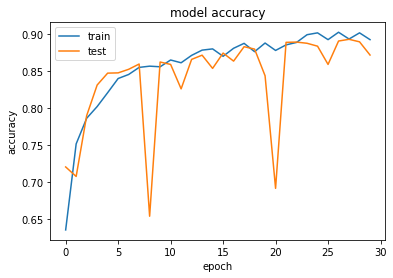

In [24]:
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model Loss



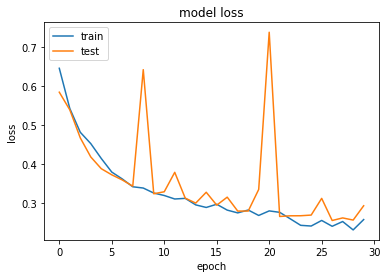

In [25]:
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion Matrix

Confusion Matrix



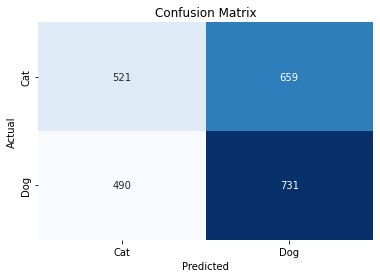

In [26]:
import seaborn as sns
print("Confusion Matrix\n")
predictions = (model.predict(test_data_generator) >= 0.5).astype(int)
cm=confusion_matrix(test_data_generator.labels, predictions, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["Cat", "Dog"])
plt.yticks(ticks=[0.5, 1.5], labels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification Report

In [27]:

cr=classification_report(test_data_generator.labels, predictions)
print("classification Report\n\n",cr)

classification Report

               precision    recall  f1-score   support

           0       0.52      0.44      0.48      1180
           1       0.53      0.60      0.56      1221

    accuracy                           0.52      2401
   macro avg       0.52      0.52      0.52      2401
weighted avg       0.52      0.52      0.52      2401



Custom Data Prediction

Dog


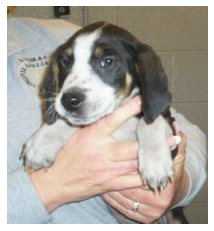

In [30]:
results={0:'cat',    1:'dog'}
image_size=(224,224)


test_image_path=Image.open("../input/cat-and-dog/training_set/training_set/dogs/dog.10.jpg")
imge=test_image_path.resize(image_size)
imge=np.expand_dims(imge,axis=0)
imge=np.array(imge)/255
final_predct=model.predict(imge)
if final_predct[0][0]>=0.5:
    print("Dog")
else:
    print("Cat")


        

plt.imshow(test_image_path)
plt.axis("off")
plt.show()
